<a href="https://colab.research.google.com/github/RafaelTadeu0/Titanic-Survival-Kaggle/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Análise de sobrevivência de passageiro do Titanic**
### **Sumário**
1. Descrição do problema
2. Objetivo
3. Exploração dos Dados
4. Processamento do Dados
5. Modelo Analítico
6. Conclusão 


#### **1. Descrição do problema**
O Titanic era um navio britânico de luxo que custou mais de 7,5 milhões de dólares (levando em conta o valor da moeda na época) para ser construído. Era operado por 892 tripulantes e podia carregar até 2435 passageiros. 

O navio foi lançado ao mar em 1911 e era famoso por ser considerado o návio mais seguro já constrúido. Esse pensamento foi um dos fatores que contruibuíram para o seu naufrágio.

O acidente do Titã se deu pelo clima e por falha humana, tais como negligência, imperícia e excesso de confiança no estrutural do navio. A fatalidade causou a morte de 1502 pessoas de um total de 2224 presentes no navio.
 
Com ajuda da sorte pouco mais que 700 pessoas sobreviram ao acidente. Contudo, será que foi apenas sorte? Ao analisar o perfil dos sobreviventes é notável a preferência por mulheres e crianças além de uma parcela significativa dos passageiros que haviam comprado passagens de primeira classe. Então, a partir dos dados disponíveis dos passageiros do navio, deve ser possível fazer uma análise que descreva quem sobreviveria e quem não.

referência: https://pt.wikipedia.org/wiki/RMS_Titanic
#### **2. Objetivo**
Para esse estudo, há dois pontos principais: A análise de quais são as características que fornecem a maior chance de sobrevivência de um passageiro e a contrução de um modelo preditivo para analisar as chances de sobrevivência de um passageiro qualquer dadas suas características.

Para tal, é essencial a escolha de uma métrica de desempenho que nos retorne um resultado válido. O score, que é medido em relação ao número de previsões corretas de um modelo, é uma métrica muito útil para estudos como esse que desejam acertar uma categoria, nesse caso de sobrevivente ou não-sobrevivente. 

#### **3. Exploração de Dados**

Antes de comerçarmos a explorar os dados, devemos importar as bibliotecas que nos permitam fazer essa exploração.

As bibliotecas "principais" são:

  * **Pandas**
    * Importação e manipulação de dataframes
  * **Numpy**
    * Funções e operações matemáticas para python
  * **Seaborn**
    * Visualização estatística dos dados


Para a exploração dos dados também é muito importante visualizar na forma de gráficos esses dados e suas características, e para isso, além da biblioteca **Seaborn**, também importamos o **Pyplot** da biblioteca **Matplotlib** e damos a ele o apelido **plt** para que fique mais fácil de se entender o código fonte.

Por fim, para seguirmos as boas práticas de programação, também importamos as bibliotecas que serão importantes para contrução do modelo para mantermos todas as importações do código num mesmo espaço.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = None

from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Agora precisamos importar os dados do problema. Esses dados são disponibilizados em uma competição do site Kaggle ( https://www.kaggle.com/c/titanic). Na competição, temos 3 arquivos disponiveis: **test.csv**, **train.csv**, e **gender_submission.csv**. No **train.csv** temos os dados para treino, isto é, usados exclusivamente para geração do modelo preditivo e possui o gabarito do problema. O **teste.csv** possui as mesmas variáveis presentes no **train.csv** de diferentes passageiros, contudo não possui o gabarito e é usado para fazer o Score do modelo gerado. O arquivo **gender_submission.csv** é apenas um exemplo de como deve-se submeter, para a competição, o resultado gerado pelo modelo no conjunto de teste.


In [ ]:
train_df = pd.read_csv('drive/My Drive/data_colab/train.csv')
test_df = pd.read_csv('drive/My Drive/data_colab/test.csv')

Com os dados importados, uma tarefa necessária é a vizualização de qual é o nosso espaço dimensional (coluna) e a quantidade de dados existente (linhas).


In [ ]:
# Verificação do dataframe de treino

print("Colunas:\t{}\nEntradas:\t{}".format(train_df.shape[1], train_df.shape[0]))

Colunas:	12
Entradas:	891


Nessas 12 colunas temos as características de cada passageiro. Vamos vizualizá-las.

In [ ]:
display(train_df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### **Colunas**
* **PassengerID**: Número que identificar do passageiro
* **Survived**: Variável de interesse que mostra se o passageiro
  * 0 = Não sobreviveu
  * 1 = Sobreviveu
* **Pclass**: Classe do bilhete
  * 1 - Primeira Classe
  * 2 - Segunda Classe
  * 3 - Terceira Classe
* **Name**: Nome dos passageiros
* **Sex**: Sexo dos passageiros
* **Age**: Idade dos passageiros
* **SibSp**: Número de irmãos e/ou cônjuges a bordo
* **Parch**: Número de pais e/ou filhos a bordo
* **Ticket**: Número de identificação do bilhete
* **Fare**: Preço do bilhete
* **Cabin**: Número de identificação da cabine do passageiro
* **Embarked**: Porto de embarque de um passageiro
  * C - Cherbourg
  * Q - Queenstown
  * S - Southampton

Também é importante a análise dos tipos de cada coluna, visto que algumas são formadas por letras, outras por números ou uma combinação de letras e números. Vale notar que na tabela acima existe um dado chamado "**NaN**" que, em tradução livre, significa "não número", ou seja, pode ser um dado faltante, uma letra num dado que deveria ser número, ou um caractere inválido.



In [ ]:
display(train_df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Pode-se notar que os dados estão distribuídos em 3 tipos diferentes:
* **int64**: Representação de números inteiros de 64-bit
* **object**: Representando palavras, caracteres ou uma mistura de números e caracteres
* **float64**: Reprentação de números tipo ponto flutuante (decimal) de 64-bit

Como esse problema não possui muitas linhas (passageiros), num primeiro momento, podemos dizer que não causará nenhum erro de memória, então não há necessidade de se fazer um tratamento nos dados númericos que ocupam espaço desnecessário de memória por serem de 64-bit. Esse tratamento serviria para que os dados que possuem valores baixos como os da coluna **Pclass** ocupassem menos espaço de memória, tornando o processamento mais veloz.

##### **Estatísticas dos dados**

In [ ]:
display(train_df.describe())
# train_df.hist(figsize=(15,12));

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### **Análise de grupos dos passageiros**
Antes de começar a construir o modelo, é necessária a visualização dos dados de forma crítica. Para isso, vamos observar a qauntidade de sobreviventes em 3 colunas do banco de dados: **Sex**, **Pclass**, e **Embarked**. Essas três variáveis possuem pouco valores, provavelmente estão bastantes correlacionados com a taxa de sobrevivência de um passageiro.

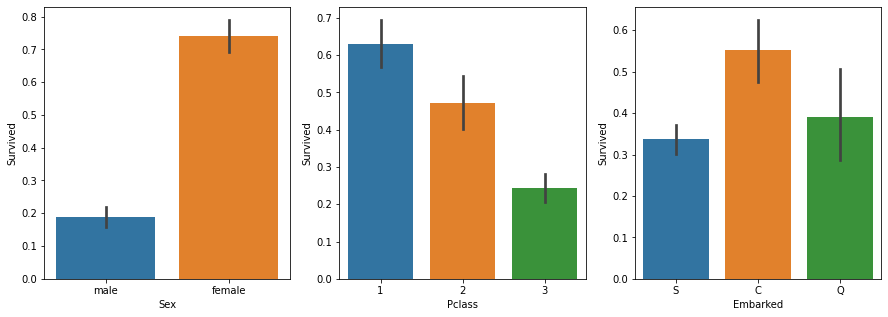

In [ ]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
fig.set_facecolor('white')
sns.barplot(x='Sex',y='Survived',data=train_df,ax=axis1)
sns.barplot(x='Pclass',y='Survived',data=train_df,ax=axis2)
sns.barplot(x='Embarked',y='Survived',data=train_df,ax=axis3)

Os gráficos acima nos mostram tendência de cada variável em relação a sobrevivência, isto é, quem tem as maiores chances de sobrevivência segundo os dados. No primeiro gráfico, vemos notavelmente que as mulheres têm mais chances de sobreviver do que os homens (cerca de 75% para as mulheres contra 18% para os homens). Outra tendência bem evidente é que quanto maior a classe do bilhete de um passageiro maior é sua chance de sobreviver. No último gráfico, a tendência é que os passageiros que embarcaram em Cherbourg tem maiores chances do que os que embarcaram nos outros dois portos. 

Dessas tendências, duas são explicadas de forma razoável. As mulheres tem maiores chances de sobreviver, pois foi decidido no momneto do acidente que elas tinham prioridade, o que é mostrado no gráfico. Os passageiros de primeira classe tinham maiores chances porque muitos deles poderiam ser políticos ou empresários influentes. Contudo, como o local de embarque de um passageiro poderia aumentar sua chance de sobreviver? 

Para responder esse questionamento, podemos mostrar qual era o perfil dos passageiros que embarcaram em cada porto.


In [ ]:
combine  = [train_df, test_df]
missing = train_df.isnull().sum()/train_df.shape[0]
missing.sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

In [ ]:

train_df = train_df.drop(["PassengerId","Name","Ticket"],axis=1)
# test_df = test_df.drop(["PassengerId","Name","Ticket"],axis=1)

train_tg = train_df.copy
train_tg
# X_train, X_test, Y_train, Y_test = train_test_split(train_df,,test_size=)


<bound method NDFrame.copy of      Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0           0       3    male  22.0      1      0   7.2500   NaN        S
1           1       1  female  38.0      1      0  71.2833   C85        C
2           1       3  female  26.0      0      0   7.9250   NaN        S
3           1       1  female  35.0      1      0  53.1000  C123        S
4           0       3    male  35.0      0      0   8.0500   NaN        S
..        ...     ...     ...   ...    ...    ...      ...   ...      ...
886         0       2    male  27.0      0      0  13.0000   NaN        S
887         1       1  female  19.0      0      0  30.0000   B42        S
888         0       3  female   NaN      1      2  23.4500   NaN        S
889         1       1    male  26.0      0      0  30.0000  C148        C
890         0       3    male  32.0      0      0   7.7500   NaN        Q

[891 rows x 9 columns]>